In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Dataset from kaggle
# https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression
dataset = pd.read_csv('../Data/framingham.csv')
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
# Drop all the NAs
dataset.dropna(inplace = True)

In [4]:
# Identify the dependent and Independent Variables
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [5]:
# Split into training and test dataset
X_train , X_test , Y_train , Y_test= train_test_split(X, Y, test_size = 0.2)

In [6]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt')

In [7]:
# Fit on training data
model.fit(X_train, Y_train)

RandomForestClassifier(max_features='sqrt')

In [8]:
Y_pred1 = model.predict(X_test)

In [9]:
# Confusion Matrix
cm_score = confusion_matrix(Y_pred1, Y_test)
print("Confusion Matrix")
print(cm_score)

# Accuracy Score
acc_score = accuracy_score(Y_pred1, Y_test)
print("Accuracy Score")
print(acc_score)

Confusion Matrix
[[613 105]
 [  8   6]]
Accuracy Score
0.8456284153005464


In [10]:
# Recall
from sklearn.metrics import recall_score
recall_score(Y_test, Y_pred1)

0.05405405405405406

In [11]:
# Precision
from sklearn.metrics import precision_score
precision_score(Y_test, Y_pred1)

0.42857142857142855

In [12]:
# F1 Score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred1)

0.096

In [13]:
# ROC Curve
from sklearn.metrics import roc_curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(Y_test, Y_pred1)

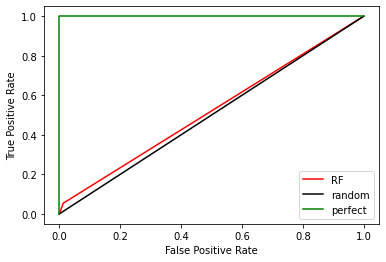

In [14]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()